### 0. Importing the Modules.

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from scipy import stats
from sklearn.preprocessing import StandardScaler
import mglearn
import matplotlib.pyplot as plt
import pandas as pd

### 1. Analysis: Frame the problem and look at the big picture
 - Find a problem/task that everyone in the group finds interesting.
   - Predicting if a company will go bankrupt.
 - Define the objective in business terms.
   - Use financial information regarding a company.
 - How should you frame the problem (supervised/unsupervised etc.)?
   - Supervised learning, it will have data and labels.
 - How should performance be measured?
   - Accuracy

### 2. Get the data
   - The data was gotten from kaggle from the following [link](https://www.kaggle.com/datasets/fedesoriano/company-bankruptcy-prediction).
   - Bankruptcy data from the Taiwan Economic Journal for the years 1999–2009

### 3. Explore the data

Importing the Dataset to work with it.

In [3]:
data = pd.read_csv("Dataset/data.csv")
labels = data["Bankrupt?"]
data = data.drop("Bankrupt?", axis=1)

### 4. Prepare the data

Here we check for correlations and make only get the ones that are over a certain threshold which in this case we agreed should be 0.15, and after that we plot each column with the lable to see how it looks and try to understand the features better.

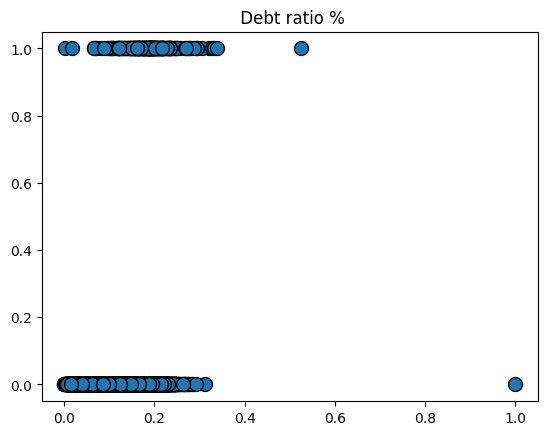

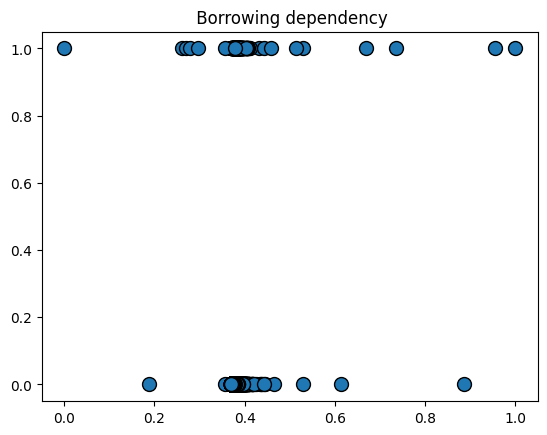

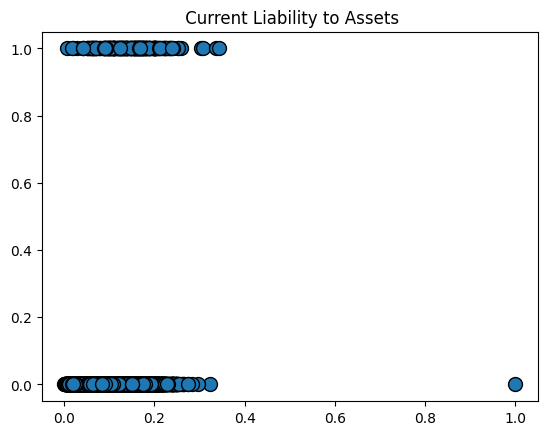

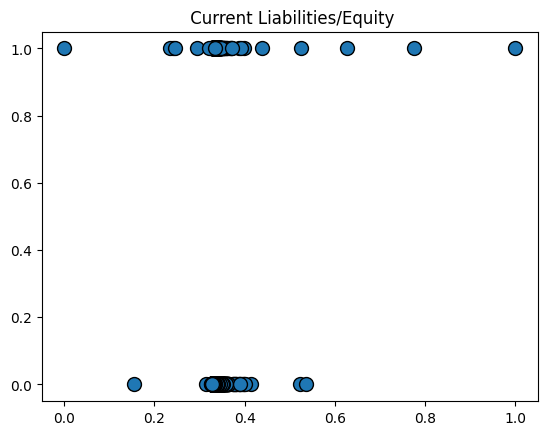

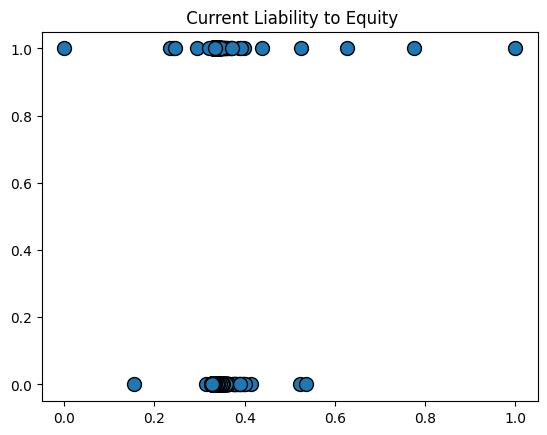

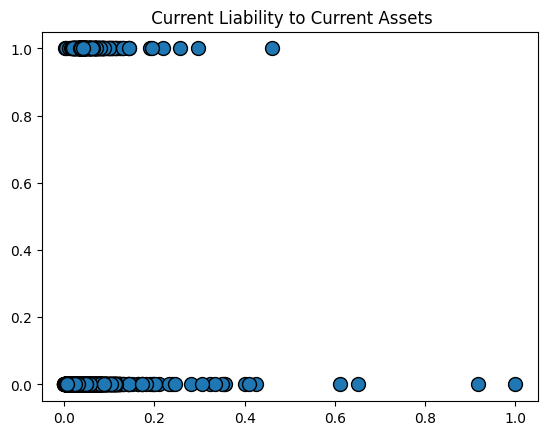

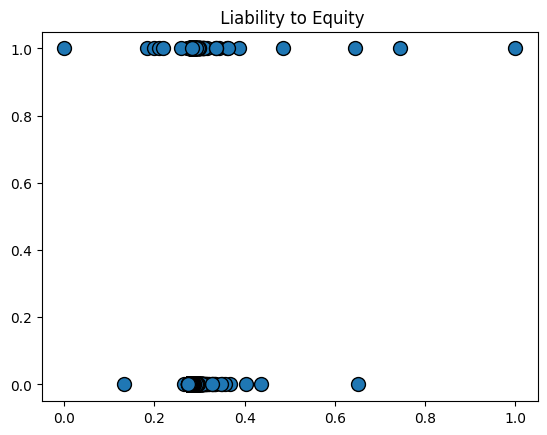

7 features had a correlation above 0.15!


C:\Users\joaob\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


In [4]:
correlations = []
indices = []
threshold = 0.15
count = 0
for index, _ in enumerate(data.columns):
    correlation = stats.pointbiserialr(data.iloc[:, index], labels)
    correlations.append(correlation.correlation)
    if correlation.correlation > threshold:
        mglearn.discrete_scatter(data.iloc[:, index], labels)
        plt.title(_)
        plt.show()
        indices.append(index)
        count += 1
data = data.iloc[:, indices]
print("{} features had a correlation above {}!".format(count, threshold))

Here StandardScaler is used to scale the features in the data, we should do this because many machine learning algorithms perform better when the features are on the same scale, this also helps ensure that one feature is not dominating others.

In [5]:
data = StandardScaler().fit_transform(data)

Separating the data and labels between training and test sets, ot is important to separate the data into a training and a test set because it allows you to evaluate your model's performance on unseen data.

In [6]:
data_train, data_test, labels_train, labels_test = train_test_split(data, labels, test_size=0.2, random_state=69)

### 5. Short-list promising models

Using a stochastic gradient descent (SGD) classifier.

In [21]:
SGD = SGDClassifier()
SGD.fit(data_train, labels_train)
results = SGD.predict(data_test)
print("Accuracy:", metrics.accuracy_score(labels_test, results))
# misclassified = (results != labels_test)
# print(misclassified)

falsebuttrue, truebutfalse = 0,0

for i in range(results.shape[0]):
    if results[i] == 1 and labels_test.values[i] == 0:
        falsebuttrue += 1
    elif results[i] == 0 and labels_test.values[i] == 1:
        truebutfalse +=1


print("There were " + str(falsebuttrue) + " companies that did not go bankrupt but the model said they did!")
print("There were " + str(truebutfalse) + " companies that went bankrupt but the model said they did not!")


Accuracy: 0.968475073313783
There were 1 companies that did not go bankrupt but the model said they did!
There were 42 companies that went bankrupt but the model said they did not!


Using a linear support vector classifier (SVC).

In [22]:
SVC = LinearSVC()
SVC.fit(data_train, labels_train)
results = SVC.predict(data_test)
print("Accuracy:", metrics.accuracy_score(labels_test, results))
# misclassified = (results != labels_test)
# print(misclassified)

falsebuttrue, truebutfalse = 0,0

for i in range(results.shape[0]):
    if results[i] == 1 and labels_test.values[i] == 0:
        falsebuttrue += 1
    elif results[i] == 0 and labels_test.values[i] == 1:
        truebutfalse +=1


print("There were " + str(falsebuttrue) + " companies that did not go bankrupt but the model said they did!")
print("There were " + str(truebutfalse) + " companies that went bankrupt but the model said they did not!")

Accuracy: 0.967008797653959
There were 5 companies that did not go bankrupt but the model said they did!
There were 40 companies that went bankrupt but the model said they did not!


C:\Users\joaob\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Using a k-nearest neighbors (KNN) algorithm.

In [23]:
KNN = KNeighborsClassifier()
KNN.fit(data_train, labels_train)
results = KNN.predict(data_test)
print("Accuracy:", metrics.accuracy_score(labels_test, results))
# misclassified = (results != labels_test)
# print(misclassified)

falsebuttrue, truebutfalse = 0,0

for i in range(results.shape[0]):
    if results[i] == 1 and labels_test.values[i] == 0:
        falsebuttrue += 1
    elif results[i] == 0 and labels_test.values[i] == 1:
        truebutfalse +=1


print("There were " + str(falsebuttrue) + " companies that did not go bankrupt but the model said they did!")
print("There were " + str(truebutfalse) + " companies that went bankrupt but the model said they did not!")

Accuracy: 0.9699413489736071
There were 5 companies that did not go bankrupt but the model said they did!
There were 36 companies that went bankrupt but the model said they did not!


Using a decision tree classifier.

In [24]:
DTC = DecisionTreeClassifier()
DTC.fit(data_train, labels_train)
results = DTC.predict(data_test)
print("Accuracy:", metrics.accuracy_score(labels_test, results))
# misclassified = (results != labels_test)
# print(misclassified)

falsebuttrue, truebutfalse = 0,0

for i in range(results.shape[0]):
    if results[i] == 1 and labels_test.values[i] == 0:
        falsebuttrue += 1
    elif results[i] == 0 and labels_test.values[i] == 1:
        truebutfalse +=1


print("There were " + str(falsebuttrue) + " companies that did not go bankrupt but the model said they did!")
print("There were " + str(truebutfalse) + " companies that went bankrupt but the model said they did not!")

Accuracy: 0.9391495601173021
There were 49 companies that did not go bankrupt but the model said they did!
There were 34 companies that went bankrupt but the model said they did not!


Using a random forest classifier

In [25]:
RFC = RandomForestClassifier()
RFC.fit(data_train, labels_train)
results = RFC.predict(data_test)
print("Accuracy:", metrics.accuracy_score(labels_test, results))
# misclassified = (results != labels_test)
# print(misclassified)

falsebuttrue, truebutfalse = 0,0

for i in range(results.shape[0]):
    if results[i] == 1 and labels_test.values[i] == 0:
        falsebuttrue += 1
    elif results[i] == 0 and labels_test.values[i] == 1:
        truebutfalse +=1


print("There were " + str(falsebuttrue) + " companies that did not go bankrupt but the model said they did!")
print("There were " + str(truebutfalse) + " companies that went bankrupt but the model said they did not!")

Accuracy: 0.967741935483871
There were 9 companies that did not go bankrupt but the model said they did!
There were 35 companies that went bankrupt but the model said they did not!


Here we can see that the majority of the error tend to happen where the companies went bankrupt but the model said they did not!